# Data set Context

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to March 2019, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.25 million accident records in this dataset. 

# Task  : 
In this project we investigate the relationship between severity of the accident and Mulitple Features. Also we predict the severity of the accident based on those features.

# Imorting All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn import metrics

**Importing Data Set** : 
Importing dataset from downloaded file on System using Panda library

In [2]:
original_data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\US_Accidents_May19 classification.csv" )

In [3]:
original_data .head()

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  

[5 rows x 49 columns]

This Shows Data has 49 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
original_data .shape

(2243939, 49)

This dataset has 2243939 enteries/rows and 49 features/columns

### Info on features/columns of the Data set

In [5]:
original_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

Result of this code shows 14 features are of float data type , 1 are of int data type , 13 are of boolean type and 21 are objects.

### Statistical Information of the Data set

In [6]:
original_data .describe()

TMC      Severity     Start_Lat     Start_Lng        End_Lat  \
count  1.727177e+06  2.243939e+06  2.243939e+06  2.243939e+06  516762.000000   
mean   2.073527e+02  2.382692e+00  3.646348e+01 -9.485567e+01      37.443109   
std    1.940527e+01  5.488029e-01  4.958759e+00  1.709453e+01       5.126585   
min    2.000000e+02  0.000000e+00  2.457022e+01 -1.246238e+02      24.570110   
25%    2.010000e+02  2.000000e+00  3.348468e+01 -1.171362e+02      33.887450   
50%    2.010000e+02  2.000000e+00  3.586428e+01 -8.818469e+01      38.038480   
75%    2.010000e+02  3.000000e+00  4.042111e+01 -8.085453e+01      41.393320   
max    4.060000e+02  4.000000e+00  4.900076e+01 -6.711317e+01      49.075000   

             End_Lng  Distance(mi)         Number  Temperature(F)  \
count  516762.000000  2.243939e+06  785537.000000    2.181674e+06   
mean      -96.527543  2.879095e-01    5625.281008    6.123244e+01   
std        17.986406  1.532341e+00   11071.872897    1.914616e+01   
min      -124.497829  0.000000e+00       1.000000   -7.780000e+01   
25%      -117.870577  0.000000e+00     803.000000    4.890000e+01   
50%       -90.192310  0.000000e+00    2672.000000    6.300000e+01   
75%       -80.895040  1.000000e-02    6846.000000    7.590000e+01   
max       -67.109242  3.336300e+02  961052.000000    1.706000e+02   

       Wind_Chill(F)   Humidity(%)  Pressure(in)  Visibility(mi)  \
count  391569.000000  2.179472e+06  2.186659e+06    2.172579e+06   
mean       26.042067  6.592758e+01  3.003747e+01    9.124096e+00   
std        13.478333  2.243013e+01  2.267242e-01    2.986359e+00   
min       -65.900000  4.000000e+00  0.000000e+00    0.000000e+00   
25%        19.200000  5.000000e+01  2.992000e+01    1.000000e+01   
50%        28.700000  6.800000e+01  3.003000e+01    1.000000e+01   
75%        36.400000  8.500000e+01  3.015000e+01    1.000000e+01   
max        45.200000  1.000000e+02  3.304000e+01    1.400000e+02   

       Wind_Speed(mph)  Precipitation(in)  
count     1.800985e+06      264473.000000  
mean      8.844042e+00           0.060439  
std       4.973200e+00           0.439698  
min       1.200000e+00           0.000000  
25%       5.800000e+00           0.000000  
50%       8.100000e+00           0.010000  
75%       1.150000e+01           0.040000  
max       8.228000e+02          10.800000

# Null Values
First we check null values in each features and remove those features which maximum null values

In [7]:
original_data.isnull().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

clearly there are some features which has around 18,00,000 null values.
we are doing classification on the basis of multiple features so we remove those features which ahs more than 10,00,000 nullvalues

In [8]:
data_wo_null = original_data.dropna(axis = 'columns' , thresh = 1000000)
data_wo_null.shape

(2243939, 44)

Now we drop rows/enteries which has null values

In [9]:
data_wo_nan = data_wo_null.dropna()
data_wo_nan .shape

(1369223, 44)

### Now we have data set of 13,69,223 enteries and 44 features without any null values

# Correlation between continuous valued features

In [10]:
cont_features = data_wo_nan.select_dtypes(exclude=['object','bool'])

In [11]:
cont_features .corr()

TMC  Severity  Start_Lat  Start_Lng  Distance(mi)  \
TMC              1.000000  0.174663  -0.006013  -0.020326      0.033998   
Severity         0.174663  1.000000   0.063123  -0.038886      0.102242   
Start_Lat       -0.006013  0.063123   1.000000   0.025356      0.068699   
Start_Lng       -0.020326 -0.038886   0.025356   1.000000      0.049775   
Distance(mi)     0.033998  0.102242   0.068699   0.049775      1.000000   
Temperature(F)   0.001187 -0.022311  -0.429300  -0.116225     -0.049909   
Humidity(%)      0.006577  0.008973   0.051237   0.173743      0.020452   
Pressure(in)    -0.003685 -0.025146  -0.009254   0.141214      0.000878   
Visibility(mi)   0.000605 -0.019380  -0.061511  -0.063287     -0.012602   
Wind_Speed(mph)  0.006984  0.013016   0.055783   0.052014      0.011100   

                 Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
TMC                    0.001187     0.006577     -0.003685        0.000605   
Severity              -0.022311     0.008973     -0.025146       -0.019380   
Start_Lat             -0.429300     0.051237     -0.009254       -0.061511   
Start_Lng             -0.116225     0.173743      0.141214       -0.063287   
Distance(mi)          -0.049909     0.020452      0.000878       -0.012602   
Temperature(F)         1.000000    -0.282601     -0.287140        0.180062   
Humidity(%)           -0.282601     1.000000     -0.046996       -0.393151   
Pressure(in)          -0.287140    -0.046996      1.000000        0.071512   
Visibility(mi)         0.180062    -0.393151      0.071512        1.000000   
Wind_Speed(mph)       -0.051268    -0.119596     -0.146009        0.001709   

                 Wind_Speed(mph)  
TMC                     0.006984  
Severity                0.013016  
Start_Lat               0.055783  
Start_Lng               0.052014  
Distance(mi)            0.011100  
Temperature(F)         -0.051268  
Humidity(%)            -0.119596  
Pressure(in)           -0.146009  
Visibility(mi)          0.001709  
Wind_Speed(mph)         1.000000

# Feature Selection
First we have 49 features but after droping features with alot of nan values we left with 44 features. So, we need to select top 10 features which help to predict severity of the accident.

In [12]:
bool_features = data_wo_nan.select_dtypes(include='bool')
bool_features.head()

Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  \
2    False  False     False     False     False    False    False       False   
3    False  False     False     False     False    False    False       False   
4    False  False     False     False     False    False    False       False   
5    False  False     False     False     False    False    False       False   
6    False  False     False     False     False    False    False       False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  
2    False  False            False            True         False  
3    False  False            False           False         False  
4    False  False            False            True         False  
5    False  False            False           False         False  
6    False  False            False           False         False

**Note** : Features with boolean values actually have True and False.

So we change these values in numbers using label encoder.

In [13]:
from sklearn import preprocessing
bool_features = bool_features.apply( preprocessing.LabelEncoder().fit_transform )
bool_features.head()

Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  \
2        0     0         0         0         0        0        0           0   
3        0     0         0         0         0        0        0           0   
4        0     0         0         0         0        0        0           0   
5        0     0         0         0         0        0        0           0   
6        0     0         0         0         0        0        0           0   

   Station  Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  
2        0     0                0               1             0  
3        0     0                0               0             0  
4        0     0                0               1             0  
5        0     0                0               0             0  
6        0     0                0               0             0

In [14]:
obj_features = data_wo_nan.select_dtypes(include = 'object')
obj_features.head(2)

ID    Source           Start_Time             End_Time  \
2  A-3  MapQuest  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  2016-02-08 07:23:34  2016-02-08 07:53:34   

                                         Description          Street Side  \
2  Accident on OH-32 State Route 32 Westbound at ...  State Route 32    R   
3  Accident on I-75 Southbound at Exits 52 52B US...          I-75 S    R   

           City      County State  ... Country    Timezone Airport_Code  \
2  Williamsburg    Clermont    OH  ...      US  US/Eastern         KI69   
3        Dayton  Montgomery    OH  ...      US  US/Eastern         KDAY   

     Weather_Timestamp Wind_Direction Weather_Condition Sunrise_Sunset  \
2  2016-02-08 06:56:00             SW          Overcast          Night   
3  2016-02-08 07:38:00             SW     Mostly Cloudy          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
2          Night               Day                   Day  
3            Day               Day                   Day  

[2 rows x 21 columns]

Clearly by seprating data by dtype of features. we see severity of accident will depend on continuous features and boolean features.

Now we concat continuous and boolean features in features variable. Then we do Fature Selection on them.

In [15]:
all_req_features = pd.concat([cont_features,bool_features],axis=1)

In [16]:
all_req_features.shape

(1369223, 23)

In [17]:
features = all_req_features.loc[: , all_req_features.columns != 'Severity']

In [18]:
target = all_req_features.loc[: , all_req_features.columns == 'Severity']

### For Feature Selection we use Annova function in SelectKBest 
First we import some library

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

In [20]:
bestfeatures = SelectKBest(score_func=f_classif,k=3)

In [21]:
fit = bestfeatures.fit(features,target)
feature_scores = pd.DataFrame(fit.scores_)
feature_scores.head()

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SS\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\SS\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0
0  10954.348985
1   1469.217093
2    558.568156
3   4735.296281
4    176.852684

In [22]:
feature_column_name=pd.DataFrame(features.columns)

In [23]:
feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
feature_score_df.columns=['Features','Score']
feature_score_df

Features         Score
0               TMC  10954.348985
1         Start_Lat   1469.217093
2         Start_Lng    558.568156
3      Distance(mi)   4735.296281
4    Temperature(F)    176.852684
5       Humidity(%)     30.338199
6      Pressure(in)    222.612374
7    Visibility(mi)    129.708795
8   Wind_Speed(mph)     58.599173
9           Amenity   1972.502765
10             Bump     21.692266
11         Crossing   9104.574554
12         Give_Way     48.114884
13         Junction   5982.998577
14          No_Exit     18.099687
15          Railway    398.719100
16       Roundabout     12.242352
17          Station   1326.356807
18             Stop   1716.694927
19  Traffic_Calming     37.704698
20   Traffic_Signal  26156.271148
21     Turning_Loop           NaN

### Top 10 Features with best scores

In [24]:
print(feature_score_df.nlargest(10,'Score'))

          Features         Score
20  Traffic_Signal  26156.271148
0              TMC  10954.348985
11        Crossing   9104.574554
13        Junction   5982.998577
3     Distance(mi)   4735.296281
9          Amenity   1972.502765
18            Stop   1716.694927
1        Start_Lat   1469.217093
17         Station   1326.356807
2        Start_Lng    558.568156


# Model Dataset

In [69]:
model_data = all_req_features[['Traffic_Signal' , 'TMC' , 'Crossing' , 'Junction' , 'Distance(mi)' , 'Amenity' , 
                               'Stop' , 'Start_Lat' , 'Station' , 'Start_Lng' , 'Severity']]
model_data .shape

(1369223, 11)

# Extracting Dependent and Independent Feature from Data set

-> Dependent Feature/Variable, y = severity of the accident ( Severity )

-> Independent Feature/Variable, x = Multiple Features

In [26]:
x = model_data[['Traffic_Signal' , 'TMC' , 'Crossing' , 'Junction' , 'Distance(mi)' , 'Amenity' , 'Stop' ,
                'Start_Lat' , 'Station' , 'Start_Lng' ]] .values
y = model_data['Severity'] .values

In [27]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[ 1.0000000e+00  2.0100000e+02  0.0000000e+00  0.0000000e+00
   1.0000000e-02  0.0000000e+00  0.0000000e+00  3.9063148e+01
   0.0000000e+00 -8.4032608e+01]
 [ 0.0000000e+00  2.0100000e+02  0.0000000e+00  0.0000000e+00
   1.0000000e-02  0.0000000e+00  0.0000000e+00  3.9747753e+01
   0.0000000e+00 -8.4205582e+01]
 [ 1.0000000e+00  2.0100000e+02  0.0000000e+00  0.0000000e+00
   1.0000000e-02  0.0000000e+00  0.0000000e+00  3.9627781e+01
   0.0000000e+00 -8.4188354e+01]
 [ 0.0000000e+00  2.0100000e+02  0.0000000e+00  0.0000000e+00
   1.0000000e-02  0.0000000e+00  0.0000000e+00  4.0100590e+01
   0.0000000e+00 -8.2925194e+01]
 [ 0.0000000e+00  2.0100000e+02  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  3.9758274e+01
   0.0000000e+00 -8.4230507e+01]]
Shape of Independent(x) variable is (1369223, 10)


In [28]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

[2 3 2 3 2]
Shape of Dependent(y) variable is (1369223,)


# Data Visualization

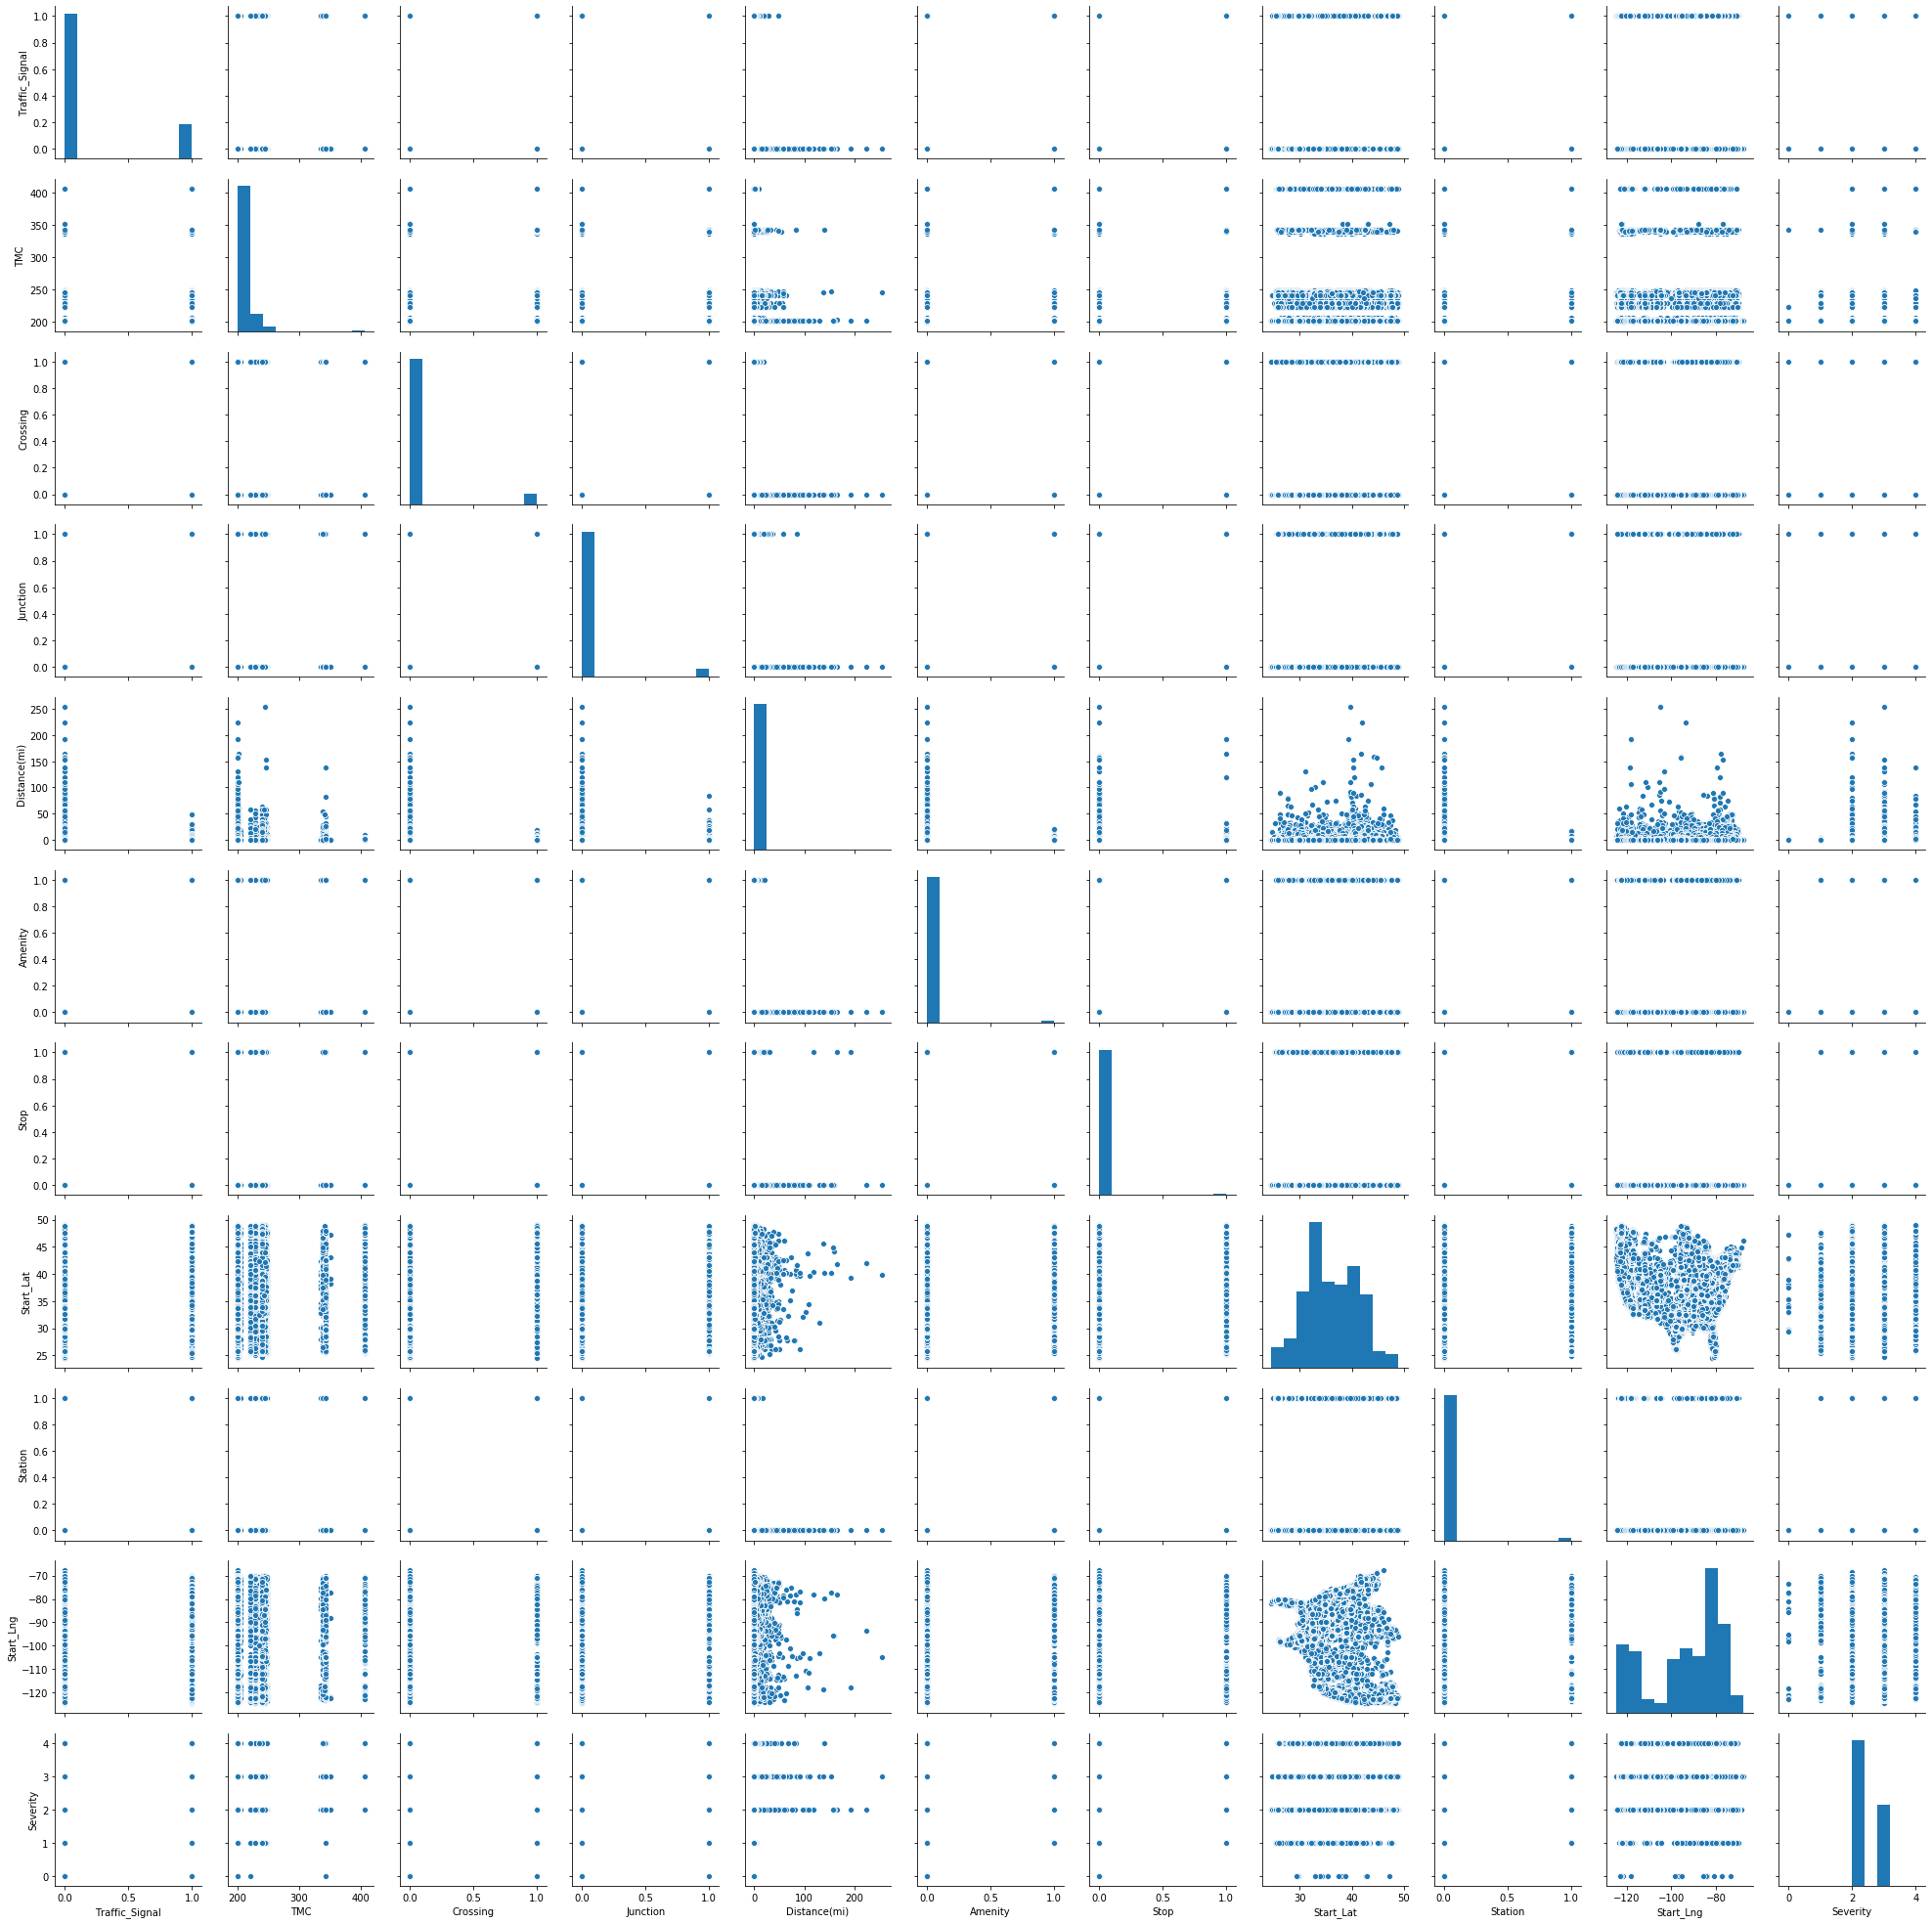

In [191]:
sns.pairplot(model_data)

Value count of Severity of accident 
2    876830
3    490599
4      1132
1       645
0        17
Name: Severity, dtype: int64


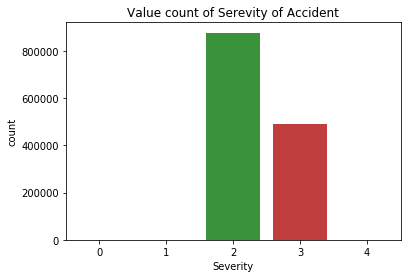

In [168]:
print(f"Value count of Severity of accident \n{model_data['Severity'].value_counts()}")
sns.countplot(y)
plt.xlabel("Severity")
plt.title("Value count of Serevity of Accident")
plt.show()

Count value of Serevity of accident of level 0 , 1 , 4 is so low that it is not visible in this plot.

# Data Preprocessing

In this model, there are multiple independent features. Also, each independent feature has different range.So, we need to make equal range for all independent features.

First we use **standard scalar** from **preprocessing** module to rescale all features.

In [169]:
x = preprocessing.RobustScaler().fit(x).transform(x)
x[0:5] 

array([[1.        , 0.        , 0.        , 0.        , 0.01      ,
        0.        , 0.        , 0.46438842, 0.        , 0.1541365 ],
       [0.        , 0.        , 0.        , 0.        , 0.01      ,
        0.        , 0.        , 0.55853135, 0.        , 0.14740398],
       [1.        , 0.        , 0.        , 0.        , 0.01      ,
        0.        , 0.        , 0.54203349, 0.        , 0.14807453],
       [0.        , 0.        , 0.        , 0.        , 0.01      ,
        0.        , 0.        , 0.60705145, 0.        , 0.19723945],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.55997814, 0.        , 0.14643384]])

### Now we split our data in train and test using train_test_split function

In [31]:
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.25,random_state=4)

In [32]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (1026917, 10) and test_x : (342306, 10)
Size of train_y : (1026917,) and test_y : (342306,)


# 1). Logistic Regression Algorithm

### First We import Logistic Regression model from linear_model Module

In [49]:
from sklearn import linear_model
LoReg = linear_model .LogisticRegression(C=0.01,multi_class='multinomial', solver='newton-cg')

### Now we fit LoReg model using train set

In [50]:
LoReg .fit( train_x , train_y )

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### Now LoReg Model is ready.

### Predicting Vaues for test_x

In [51]:
pred_y=LoReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [52]:
comp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':pred_y})
comp_df.head(10)

Actual values  Predicted values
0              2                 2
1              2                 2
2              3                 3
3              2                 2
4              2                 2
5              2                 2
6              3                 3
7              2                 2
8              3                 2
9              3                 2

## Here we have 4 type of classifiers. So, ROC curve can't be made.

# Evaluation of LoReg Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [53]:
LoReg.score(train_x,train_y)

0.6843766341388837

In [54]:
lras=metrics.accuracy_score(test_y,pred_y)
lras

0.6839377632878185

In [55]:
cnf_matrix=confusion_matrix(test_y,pred_y)
cnf_matrix

array([[     0,      0,      4,      1,      0],
       [     0,      0,    152,      3,      0],
       [     0,      0, 200087,  19002,      0],
       [     0,      0,  88709,  34029,      0],
       [     0,      0,    209,    110,      0]], dtype=int64)

In [56]:
print(classification_report(test_y,pred_y))

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00       155
           2       0.69      0.91      0.79    219089
           3       0.64      0.28      0.39    122738
           4       0.00      0.00      0.00       319

    accuracy                           0.68    342306
   macro avg       0.27      0.24      0.23    342306
weighted avg       0.67      0.68      0.64    342306



### From above report. Its clear this model is not so good to classify the Serevity of accident. Its accuracy score is also 68%.

# 2). K- Nearest Neighbour Algorithm

### First We import KNeighborsClassifier model from neighbors Module

To do modeling we have to take some value of k.
let k = 4

In [57]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
KNN=KNeighborsClassifier(n_neighbors=k)

### Now we fit LoReg model using train set

In [58]:
KNN.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Now KNN Model is ready.

### Predicting Vaues for test_x

In [59]:
kpred_y=LoReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [60]:
kcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':kpred_y})
kcomp_df.head()

Actual values  Predicted values
0              2                 2
1              2                 2
2              3                 3
3              2                 2
4              2                 2

For better result we **repeat this algorithm for k = 1 to k = 10**

We just find accuracy score and decide for which value of k our KNN model is best.

In [65]:
Ks=10
mean_acc=np.zeros((Ks))

for n in range(1,Ks+1):
    KnN=KNeighborsClassifier(n_neighbors=n).fit(train_x,train_y)
    KPred_y=KnN.predict(test_x)
    mean_acc[n-1]=metrics.accuracy_score(test_y,KPred_y)


Mean Accuracy for k=1 to 9 : [0.907311   0.89713005 0.91703038 0.91277103 0.9154616  0.91288496
 0.9120553  0.91079619 0.90949034 0.90831303]


In [94]:
print(f"Mean Accuracy for k=1 to 10 : {mean_acc}")

Mean Accuracy for k=1 to 10 : [0.907311   0.89713005 0.91703038 0.91277103 0.9154616  0.91288496
 0.9120553  0.91079619 0.90949034 0.90831303]


In [66]:
print( "The best accuracy is", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy is 0.9170303763299504 with k = 3


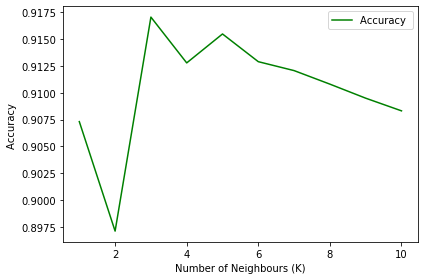

In [67]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

## From above graph, its clear Best accuracy of this model is for k = 3 and lowest accuracy is for k =  2

Also, lowest accuarcy of this model is greater than logistic regression model for same data.

# 3). Decision Tree Algorithm

### First We import DecisionTreeClassifier model from tree Module

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtre=DecisionTreeClassifier(criterion='entropy',max_depth=7)

### Now we fit dtre model using train set

In [34]:
dtre.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Now dtre Model is ready.

### Predicting Vaues for test_x

In [35]:
dtpred_y=dtre.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [36]:
dtcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':dtpred_y})
dtcomp_df.head()

Actual values  Predicted values
0              2                 2
1              2                 2
2              3                 3
3              2                 2
4              2                 2

# Model Visualization

In [ ]:
plt.plot(dtpred_y,test_y,'bo')
plt.show()

In [ ]:
columns = model_data.columns[0:10].tolist()
columns
target_class = model_data['Severity'].tolist()
cl= []
for i in target_class:
    cl.append(str(i))

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(900,700))
plot_tree(dtre, filled=True, label='all' , feature_names= model_data.columns[0:10],class_names=cl)
plt.savefig('tree', )

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(dtre, filled=True, feature_names= columns, class_names=cl )
plt.savefig('tree', )
    
    

str

# Evaluation of dtre Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [38]:
dtre.score(test_x,test_y)

0.7106477829778035

In [180]:
dtcnf_matrix=confusion_matrix(test_y,dtpred_y)
dtcnf_matrix

array([[     0,      0,      4,      1,      0],
       [     0,      0,    135,     20,      0],
       [     0,      0, 186693,  32396,      0],
       [     0,      0,  66172,  56565,      1],
       [     0,      0,     92,    226,      1]], dtype=int64)

In [39]:
dtas=metrics.accuracy_score(test_y,dtpred_y)
dtas

0.7106477829778035

In [182]:
print(classification_report(test_y,dtpred_y))

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00       155
           2       0.74      0.85      0.79    219089
           3       0.63      0.46      0.53    122738
           4       0.50      0.00      0.01       319

    accuracy                           0.71    342306
   macro avg       0.37      0.26      0.27    342306
weighted avg       0.70      0.71      0.70    342306



# -> Decision tree using Id3Estimator

### First We import Id3Estimator model from id3 library

In [183]:
from id3 import Id3Estimator
estimator=Id3Estimator()

### Now we fit using train set

In [184]:
idt=estimator.fit(train_x,train_y)

### Now idt Model is ready.

### Predicting Vaues for test_x

In [185]:
idtpred_y=idt.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [186]:
idtcomp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':idtpred_y})
idtcomp_df.head()

Actual values  Predicted values
0              2                 2
1              2                 2
2              3                 3
3              2                 2
4              2                 2

# Evaluation of idtre Model

Here, we evaluate the model using score functions, Classification Report and Confusion Matrix

In [187]:
idtcnf_matrix=confusion_matrix(test_y,idtpred_y)
idtcnf_matrix

array([[     0,      0,      4,      1,      0],
       [     0,      0,    141,     14,      0],
       [     0,      0, 187707,  31382,      0],
       [     0,      0,  68132,  54606,      0],
       [     0,      0,    116,    203,      0]], dtype=int64)

In [188]:
idtas=metrics.accuracy_score(test_y,idtpred_y)
idtas

0.7078841738093986

In [189]:
print(classification_report(test_y,idtpred_y))

C:\Users\SS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00       155
           2       0.73      0.86      0.79    219089
           3       0.63      0.44      0.52    122738
           4       0.00      0.00      0.00       319

    accuracy                           0.71    342306
   macro avg       0.27      0.26      0.26    342306
weighted avg       0.70      0.71      0.69    342306



## Clearly, From above Accuracy score of decision tree by DecisionTreeClassifier and by ID3 estimator are almost same.
But it is litle more than Logistic regression and very less than KNN Classification method.